# Classificação de padrões no Scikit-learn

In [37]:
# importando bibliotecas
import pandas as pd
import numpy as np


In [38]:
# Criando arquivo/caminho do arquivo
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")

# Definindo (setando) um novo index para o arquivo
df = df.set_index('date')

df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


**---------------------------------------------------------------------------------------------------------------------------**

---

**---------------------------------------------------------------------------------------------------------------------------**


##### Extraindo os valores do arquivo e colocando para as variáveis

In [39]:
x, y = df[['temperatura']].values, df[['classification']].values

print("X:\n", x)
print()
print("Y:\n", y)

X:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]

Y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


**---------------------------------------------------------------------------------------------------------------------------**

---

**---------------------------------------------------------------------------------------------------------------------------**

- Importando a biblioteca Scikit-learn, mas apenas uma classe (_que é a necessária para agora_) 

In [40]:
# pré-processamento
from sklearn.preprocessing import LabelEncoder



**---------------------------------------------------------------------------------------------------------------------------**

---

**---------------------------------------------------------------------------------------------------------------------------**

- Os valores contido em Y são todos valores de caracteres, e por isso, eles não tem a cabacidade de usar expressões booleanas para o nosso objetivo.
- Por isso, precisamos converter a variável **Y** para valores _numericos_

In [41]:
# Instanciando a classe LabelEncoder
le = LabelEncoder()

# Conversão de Y para valores numéricos
y = le.fit_transform(y.ravel())

print("Y: \n", y)

Y: 
 [3 2 3 3 0 1]


---

- Valores antes da conversão:
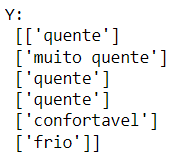 

- Valores pós conversão:
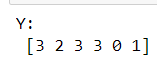

    - 3 é quente;
    - 2 é muito quente;
    - 1 é frio;
    - 0 é confórtavel;
    

**---------------------------------------------------------------------------------------------------------------------------**

---

**---------------------------------------------------------------------------------------------------------------------------**


- Após feito a conversão dos dados que serão utilizados para tipos numericos, eles estão pronto para serem utilizados em um modelo de classificação.       
.
- O modelo utilizado em aula, é um dos modelos mais básicos e simples, que é chamado de Regressão Logistica.        

    - Falando brevemente: o que esse modelo faz é gerar uma função que vai discriminar da melhor maneira possível as classes (_Nesse caso, é muito quente, quente, frio e confortável_)

In [42]:
# importando classe do Modelo
from sklearn.linear_model import LogisticRegression

In [43]:
# Instanciando o classificador
clr = LogisticRegression()  # clf == Classe LogisticRegression
clr.fit(x, y)

LogisticRegression()

- A função _fit_ vai ser o que vai treinar nosso programa, calculando os parâmetros.  
.
- Ele precisa receber dois parâmetros.
    - 1ª parâmetro é o conjunto de amostras de atributos.
    - 2ª parâmetro é a variável alvo.

**---------------------------------------------------------------------------------------------------------------------------**

---

**---------------------------------------------------------------------------------------------------------------------------**


- Agora que temos um modelo treinado, vamos tentar ver qual a predição dele por valores distintos (_usaremos a coluna de temperatura para fazer essa predição_).

In [44]:
# Geraremos 100 valores de temperatura.
# Estarão linearmente espaçados entre 0 e 45.

# Predição em novos valores de temperatura.
x_test = np.linspace(start=0., stop=45., num=100).reshape(-1, 1)

# Predição desses valores
y_predicao = clr.predict(x_test)

In [45]:
# Vamos ver os resultados:
print(y_predicao)


print("\nLembrando que esses valores (0, 1, 2, 3), são os valores convertidos. ")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Lembrando que esses valores (0, 1, 2, 3), são os valores convertidos. 


**---------------------------------------------------------------------------------------------------------------------------**

---

**---------------------------------------------------------------------------------------------------------------------------**

In [48]:
# Instanciando a classe LabelEncoder
le = LabelEncoder()

# Conversão de y_predicao para os valores originais
y_predicao = LabelEncoder().inverse_transform(y_predicao)
print(y_predicao)

# <<< ERRO: NÃO CONSEGUI CONVERTER DE VOLTA ESSES VALORES >>>

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


**---------------------------------------------------------------------------------------------------------------------------**

---

**---------------------------------------------------------------------------------------------------------------------------**

In [49]:
# Output mais bonito para visualizar

output = {'new_temp': x_test.ravel(),
         'new_classification': y_predicao.ravel()}

output = pd.DataFrame(output)

In [50]:
output

,new_temp,new_classification
0,0.000000,1
1,0.454545,1
2,0.909091,1
3,1.363636,1
4,1.818182,1
...,...,...
95,43.181818,2
96,43.636364,2
97,44.090909,2
98,44.545455,2


In [51]:
# informações do output
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_temp            100 non-null    float64
 1   new_classification  100 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


In [52]:
# Estatisticas do output
output.describe()

,new_temp,new_classification
count,100.000000,100.00000
mean,22.500000,1.50000
std,13.187042,0.78496
min,0.000000,0.00000
25%,11.250000,1.00000
50%,22.500000,1.00000
75%,33.750000,2.00000
max,45.000000,3.00000


**---------------------------------------------------------------------------------------------------------------------------**

---


**---------------------------------------------------------------------------------------------------------------------------**

- Vamos colocar agora em gráficos

<Axes: title={'center': '# De novos valores gerados'}, xlabel='new_classification'>

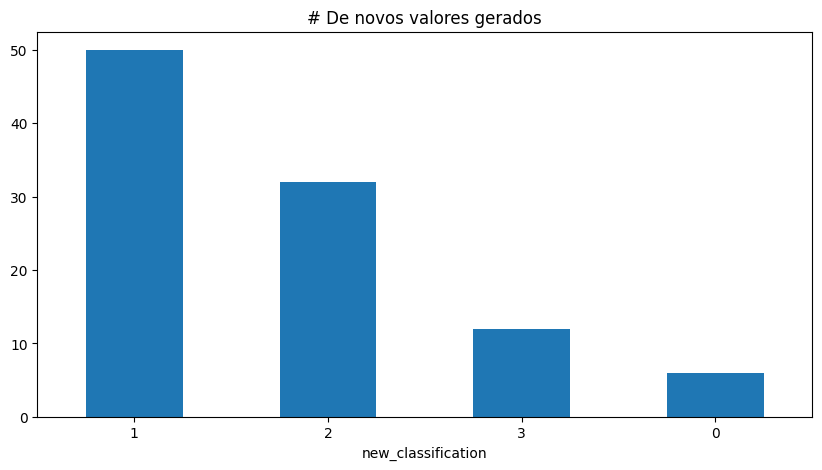

In [53]:
# Contagem de valores gerados e geração de um gráfico de barra
output['new_classification'].value_counts().plot.bar(figsize=(10, 5),
                                                    rot = 0,
                                                    title = "# De novos valores gerados")

- 1 = Frio    
- 2 = Muito Quente    
- 3 = Quente 
- 0 = Confortável